In [27]:
# import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt 
# import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
df = pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [29]:
df.shape

(768, 9)

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- From the EDA of this dataset we found that there are some 0 values in BloodPressure, SkinThickness colums, so those values are replaced by mean value of that particular column

In [31]:
df['BMI']= df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']= df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']= df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [32]:
## Indep feature and dep feature
X= df.iloc[:,:-1]
y = df['Outcome']

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
import pickle
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model 
    file = open('/config/workspace/Models/scaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [35]:
X_train_scaled , X_test_scaled = scaler_standard(X_train,X_test)

In [36]:
X_train_scaled

array([[-0.8362943 , -0.89585789, -0.99370784, ..., -1.20340503,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.56374882, -0.01067906, ...,  0.66490433,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43257839, -0.33835532, ...,  1.44097129,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.69659245,  1.13618785, ...,  1.91523444,
         1.94892066,  0.42190587],
       [-1.14304979,  0.63184384, -0.24779635, ...,  1.4553429 ,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.10046932,  1.9553785 , ..., -1.40460758,
        -0.60836445, -1.03426754]])

In [37]:
X_test_scaled

array([[ 0.69748316, -0.79622517, -1.15754597, ...,  0.24812762,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.33127247,  0.23507814, ...,  0.492445  ,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.4641161 , -0.66603158, ..., -0.21176391,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.16689114,  0.64467346, ...,  0.57867466,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.56374882, -0.17451719, ..., -0.21176391,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.49365422,  0.80851159, ...,  0.50681661,
        -0.91851573,  0.16493409]])

## Logistic Regression

In [38]:
clfr_lr = LogisticRegression()
clfr_lr.fit(X_train,y_train)

LogisticRegression()

In [39]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [40]:
parameters = {'penalty':('l1','l2','elasticnet',None),'C':[1,10,20]}

In [41]:
clf_lr = GridSearchCV(clfr_lr,param_grid=parameters,cv=5)

In [42]:
clf_lr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None)})

In [43]:
clf_lr.best_params_

{'C': 10, 'penalty': 'l2'}

In [44]:
clfrr=LogisticRegression(C=10,penalty='l2')

In [45]:
clfrr.fit(X_train_scaled,y_train)

LogisticRegression(C=10)

In [46]:
y_pred_lr = clfrr.predict(X_test_scaled)
print(confusion_matrix(y_pred_lr,y_test))
print(accuracy_score(y_pred_lr,y_test))
print(classification_report(y_pred_lr,y_test))

[[124  32]
 [ 27  48]]
0.7445887445887446
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       156
           1       0.60      0.64      0.62        75

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.75      0.74      0.75       231



## Decision Tree Model Training With HyperParameter Tuning

In [47]:
import warnings 
warnings.filterwarnings('ignore')

In [48]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

- Since this is a large dataset so we will do prepruning

In [49]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

- Since this dataset has so many datapoints, so we will do Prepruning

In [51]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,9],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
treeclassifier = DecisionTreeClassifier()
clfrd = GridSearchCV(treeclassifier,param_grid=parameter,cv=5, scoring='accuracy')

In [54]:
clfrd.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
clfrd.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [56]:
y_pred = clfrd.predict(X_test)

In [57]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[132  50]
 [ 19  30]]
0.7012987012987013
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       182
           1       0.38      0.61      0.47        49

    accuracy                           0.70       231
   macro avg       0.62      0.67      0.63       231
weighted avg       0.77      0.70      0.72       231



- With PostPruning

In [58]:
clfr = DecisionTreeClassifier(max_depth =5)

In [59]:
clfr.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [60]:
y_pred_dt = clfr.predict(X_test)

In [61]:
print(confusion_matrix(y_pred_dt,y_test))
print(accuracy_score(y_pred_dt,y_test))
print(classification_report(y_pred_dt,y_test))


[[122  32]
 [ 29  48]]
0.7359307359307359
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       154
           1       0.60      0.62      0.61        77

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



[Text(0.5486111111111112, 0.9166666666666666, 'x[1] <= 154.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(0.3055555555555556, 0.75, 'x[7] <= 28.5\ngini = 0.383\nsamples = 454\nvalue = [337, 117]'),
 Text(0.1527777777777778, 0.5833333333333334, 'x[1] <= 127.5\ngini = 0.22\nsamples = 238\nvalue = [208, 30]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[5] <= 49.1\ngini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(0.05555555555555555, 0.25, 'x[5] <= 31.4\ngini = 0.1\nsamples = 190\nvalue = [180, 10]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.018\nsamples = 108\nvalue = [107, 1]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.195\nsamples = 82\nvalue = [73, 9]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[2] <= 73.0\ngini = 0.476\nsamples = 46\nvalue = [28, 18]'),
 Text(0.16666666666666666, 0.25, 'x[0] <= 3.5\ngini = 0.499\nsamples = 27\nvalue = [13, 14

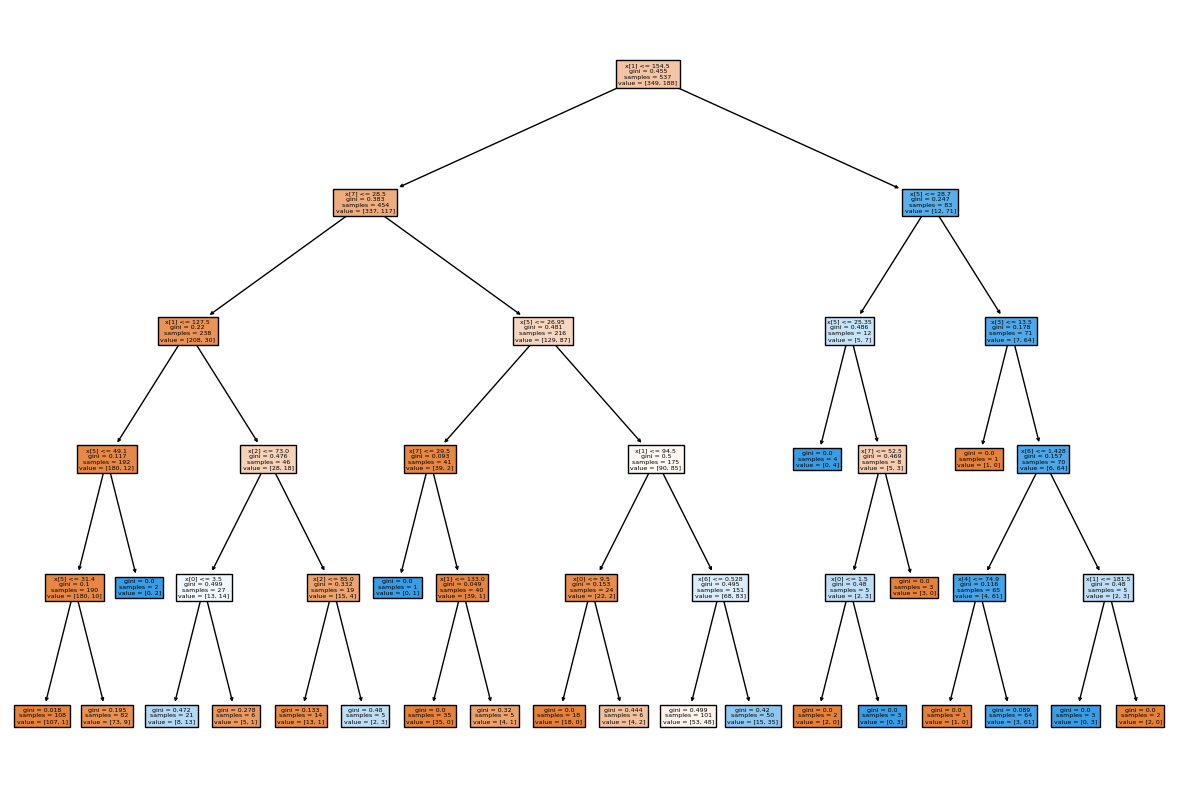

In [64]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(clfr,filled=True)

## Using Support Vector Classifier

In [65]:
parameters = {
    'C': [0.1,1,10],
    'gamma':
[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','rbf']
}

In [66]:
from sklearn import svm
svc = svm.SVC()
grid = GridSearchCV(svc,param_grid=parameters,refit= True,cv=3, scoring='accuracy')
# grid.fit(X_train,y_train)

In [67]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [68]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [69]:
svc_clf = SVC(C=0.1,gamma=1,kernel = 'linear')
svc_clf.fit(X_train_scaled,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [70]:
y_pred_svc = svc_clf.predict(X_test_scaled)

In [71]:
print(confusion_matrix(y_pred_svc,y_test))
print(accuracy_score(y_pred_svc,y_test))
print(classification_report(y_pred_svc,y_test))

[[126  33]
 [ 25  47]]
0.7489177489177489
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       159
           1       0.59      0.65      0.62        72

    accuracy                           0.75       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.76      0.75      0.75       231



## Using Naive Bayes classifier

In [72]:
from sklearn.naive_bayes import GaussianNB


In [73]:
nb_clf = GaussianNB()

In [74]:
nb_clf.fit(X_train,y_train)

GaussianNB()

In [75]:
y_pred_nb = nb_clf.predict(X_test)

In [76]:
print(confusion_matrix(y_pred_nb,y_test))
print(accuracy_score(y_pred_nb,y_test))
print(classification_report(y_pred_nb,y_test))

[[120  29]
 [ 31  51]]
0.7402597402597403
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       149
           1       0.64      0.62      0.63        82

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



- So we trained 4 models their accuracies are :
- Logistic Regression 0.7445887
- Decision Tree 0.7359307
- SVC 0.74891774
- Naive Bayes 0.7402597

#### So we will use SVC

In [77]:
import pickle
pickle.dump(svc_clf,open('/config/workspace/Models/S_V_classifier.pkl','wb'))